# UCCS Exif

- read in all images and extract metadata
- export to CSV

In [216]:
%reload_ext autoreload
%autoreload 2

from os.path import join
from glob import glob
from pprint import pprint

import collections
import cv2 as cv
import pandas as pd
from PIL import Image, ImageDraw, ExifTags

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import math

from pathlib import Path
from tqdm import tqdm_notebook as tqdm

In [2]:
fp_dir_uccs = '/data_store/datasets/people/uccs/dataset'
fp_dir_ims = '/data_store/datasets/people/uccs/dataset/media/original'
fp_out_exif = '/data_store/datasets/people/uccs/processed/exif/uccs_camera_exif.csv'
fp_out_exif_test = '/data_store/datasets/people/uccs/processed/exif/uccs_camera_exif_test.csv'

In [3]:
fp_ims = glob(join(fp_dir_ims, '*.jpg'))
print(len(fp_ims))

10917


In [6]:
def get_exif(fp_im, raw=False):
  im = Image.open(fp_im)
  exif_raw = im._getexif()  
  exif_data = {}
  for tag, value in exif_raw.items():
    decoded = ExifTags.TAGS.get(tag, tag)
    exif_data[decoded] = value
  if raw:
    return exif_data
  else:
    im_w = exif_data['ExifImageWidth']
    im_h = exif_data['ExifImageHeight']
    #date_time_digitized = exif_data['DateTimeDigitized']
    #date_time_original = exif_data['DateTimeOriginal']
    date_times = exif_data['DateTime'].split(' ')
    date_time = date_times[0].replace(':', '-') + ' ' + date_times[1]
    copyright = exif_data['Copyright']
    aperture_value = exif_data['ApertureValue'][0] / exif_data['ApertureValue'][0]
    fnumber = exif_data['FNumber'][0] / exif_data['FNumber'][1]
    focal_length = int(exif_data['FocalLength'][0] / exif_data['FocalLength'][1])
    iso = int(exif_data['ISOSpeedRatings'])
    exposure_mode = exif_data['ExposureMode']
    exposure_program = exif_data['ExposureProgram']
    #focal_plane_x = exif_data['FocalPlaneXResolution'][0] / exif_data['FocalPlaneXResolution'][1]
    #focal_plane_y = exif_data['FocalPlaneYResolution'][0] / exif_data['FocalPlaneYResolution'][1]
    result = {
  #     'image_width': im_w,
  #     'image_height': im_h,
      'date_time': date_time,
      #'date_time_digitized': date_time_digitized,
      #'date_time_original': date_time_original,
      #'copyright': copyright,
      'aperture': aperture_value,
      'fnumber': fnumber,
      'focal_length': focal_length,
      'exposure_program': exposure_program,
      'exposure_mode': exposure_mode,
      'iso': iso
    }
    return result
    

In [7]:
exif_data = []
for fp_im in tqdm(fp_ims):
  im_exif = get_exif(fp_im)
  im_exif.update({'filename': Path(fp_im).name})
  exif_data.append(im_exif)

In [10]:
for ex in exif_data:
  #ex['focal_length'] = int(ex['focal_length'])
  splits = ex['date_time'].split(' ')
  ex['date'] = splits[0]
  ex['time'] = splits[1]

In [11]:
df_exif = pd.DataFrame.from_dict(exif_data)
df_exif['date_time'] = pd.to_datetime(df_exif['date_time'])
#df_exif.to_csv(fp_out_exif, index=False)
df_exif.to_csv(fp_out_exif, index=False)

In [12]:
df_exif.head()

aperture        date           date_time  exposure_mode  exposure_program  \
0       1.0  2013-01-29 2013-01-29 12:07:45              1                 1   
1       1.0  2012-04-03 2012-04-03 11:07:53              0                 3   
2       1.0  2013-01-29 2013-01-29 12:08:01              1                 1   
3       1.0  2013-02-20 2013-02-20 12:16:35              1                 1   
4       1.0  2013-02-19 2013-02-19 16:30:51              1                 1   

                               filename  fnumber  focal_length  iso      time  
0  e87a43c32cc697d3e6b40be3e3594057.jpg      5.6           800  100  12:07:45  
1  9d15290fdd811d5cbaeb44448a4b54d3.jpg      5.6           800  400  11:07:53  
2  d9cad73c2f47022195169e07f21dc567.jpg      5.6           800  100  12:08:01  
3  decf44da0b963a33c88362e613878820.jpg      5.6           800  160  12:16:35  
4  4a59b6b9b50cf6fc87e45caa0fdb86df.jpg      5.6           800  400  16:30:51

In [13]:
exif_dates = df_exif.groupby('date')

In [36]:
dates = list(exif_dates.groups.keys())
print(len(dates))
pprint(dates)

18
['2012-02-23',
 '2012-03-06',
 '2012-03-08',
 '2012-03-13',
 '2012-03-20',
 '2012-03-22',
 '2012-04-03',
 '2012-04-12',
 '2012-04-17',
 '2012-04-24',
 '2012-04-25',
 '2012-04-26',
 '2013-01-28',
 '2013-01-29',
 '2013-02-13',
 '2013-02-19',
 '2013-02-20',
 '2013-02-26']


## Parse CSV to Markdown

In [3]:
df_exif = pd.read_csv(fp_out_exif)

In [4]:
df_exif.head()

aperture        date            date_time  exposure_mode  exposure_program  \
0       1.0  2013-01-29  2013-01-29 12:07:45              1                 1   
1       1.0  2012-04-03  2012-04-03 11:07:53              0                 3   
2       1.0  2013-01-29  2013-01-29 12:08:01              1                 1   
3       1.0  2013-02-20  2013-02-20 12:16:35              1                 1   
4       1.0  2013-02-19  2013-02-19 16:30:51              1                 1   

                               filename  fnumber  focal_length  iso      time  
0  e87a43c32cc697d3e6b40be3e3594057.jpg      5.6           800  100  12:07:45  
1  9d15290fdd811d5cbaeb44448a4b54d3.jpg      5.6           800  400  11:07:53  
2  d9cad73c2f47022195169e07f21dc567.jpg      5.6           800  100  12:08:01  
3  decf44da0b963a33c88362e613878820.jpg      5.6           800  160  12:16:35  
4  4a59b6b9b50cf6fc87e45caa0fdb86df.jpg      5.6           800  400  16:30:51

In [5]:
date_groups = df_exif.groupby('date')

In [33]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [350]:
date_times = {}
weekday_times = {}
cal_date_counts = {}

for d in days:
  date_times[d] = []
  weekday_times = []
  
for date_str, date_group in date_groups:
  
  year, month, date = (int(x) for x in date_str.split('-'))    
  day_idx = datetime.date(year, month, date).weekday()
  day = days[day_idx]
  for item in date_group.itertuples():
    hour, minute, second = (int(x) for x in item.time.split(':'))
    dt = datetime.datetime(year, month, date, hour, minute, second, 0)
    date_times[day].append(dt)
    # date count
    if date_str not in cal_date_counts.keys():
      cal_date_counts[date_str] = 0
    cal_date_counts[date_str] += 1

date_counts = {}
for day, hours in date_times.items():
  date_counts[day] = len(hours)
  print(day, len(hours))
  
# print date counts
for k,v in cal_date_counts.items():
  print(k,v)

print(len(cal_date_counts))

Monday 1056
Tuesday 7029
Wednesday 1715
Thursday 1117
Friday 0
Saturday 0
Sunday 0
2012-02-23 132
2012-03-06 288
2012-03-08 506
2012-03-13 160
2012-03-20 1840
2012-03-22 445
2012-04-03 1639
2012-04-12 14
2012-04-17 19
2012-04-24 63
2012-04-25 11
2012-04-26 20
2013-01-28 1056
2013-01-29 1561
2013-02-13 739
2013-02-19 723
2013-02-20 965
2013-02-26 736
18


## Plot Data

In [317]:
plt.style.use(['dark_background'])
bar_clr = '#9E0142'
face_clr = '#181818'
grid_clr = '#333333'
frame_clr =  '#333333'

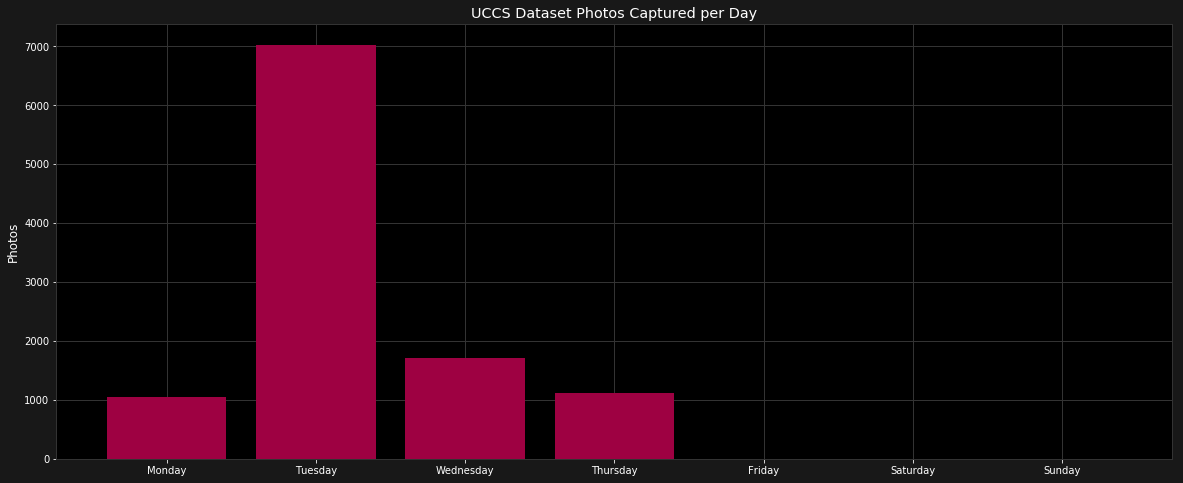

In [338]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,8), dpi=72, facecolor=face_clr)
ax = plt.subplot(111) # Upper Plot

num_photos = list(date_counts.values())
x_pos = [i for i, _ in enumerate(days)]
plt.bar(x_pos, num_photos, color=bar_clr)
plt.grid(linestyle='-', linewidth='1', color=grid_clr)
plt.setp(ax.spines.values(), color=frame_clr)
plt.ylabel("Photos")
plt.title('UCCS Dataset Photos Captured per Day')
fig.set_facecolor(face_clr)
plt.xticks(x_pos, days)
plt.show()
fig.savefig('/mnt/ahprojects/tmp/uccs_exif_plot_days.png', dpi=fig.dpi, transparent=True)

In [345]:
# bucket times into 30min intervals
delta = 10
time_buckets = {}
for day_name, times in date_times.items():
  time_buckets[day_name] = {}
  for t in times:
    # conver times
    bucket_name = '{:02}:{:02}'.format(t.hour, (t.minute // delta) * delta)
    if not bucket_name in time_buckets[day_name].keys():
      time_buckets[day_name][bucket_name] = 0
    time_buckets[day_name][bucket_name] += 1

# add all keys to all days
all_time_keys = []
for k, v in time_buckets.items():
  all_time_keys += list(v.keys())

# reduce to unique
all_time_keys = set(all_time_keys)

for k, v in time_buckets.items():
  for atk in all_time_keys:
    if atk not in time_buckets[k].keys():
      time_buckets[k][atk] = 0
  
for k, v in time_buckets.items():
  time_buckets[k] = collections.OrderedDict(sorted(v.items()))

In [346]:
for k, v in time_buckets.items():
  print(time_buckets[k])

OrderedDict([('09:30', 0), ('09:40', 0), ('10:40', 0), ('10:50', 0), ('11:00', 0), ('11:10', 0), ('11:50', 0), ('12:00', 0), ('12:10', 0), ('12:20', 0), ('12:30', 662), ('12:40', 394), ('12:50', 0), ('13:00', 0), ('13:10', 0), ('13:20', 0), ('13:30', 0), ('13:50', 0), ('14:00', 0), ('14:10', 0), ('14:50', 0), ('15:00', 0), ('15:20', 0), ('16:10', 0), ('16:20', 0), ('16:30', 0)])
OrderedDict([('09:30', 414), ('09:40', 664), ('10:40', 0), ('10:50', 0), ('11:00', 832), ('11:10', 376), ('11:50', 0), ('12:00', 361), ('12:10', 710), ('12:20', 306), ('12:30', 901), ('12:40', 48), ('12:50', 0), ('13:00', 0), ('13:10', 0), ('13:20', 167), ('13:30', 121), ('13:50', 365), ('14:00', 0), ('14:10', 0), ('14:50', 0), ('15:00', 0), ('15:20', 312), ('16:10', 183), ('16:20', 797), ('16:30', 472)])
OrderedDict([('09:30', 0), ('09:40', 0), ('10:40', 0), ('10:50', 5), ('11:00', 6), ('11:10', 0), ('11:50', 5), ('12:00', 356), ('12:10', 380), ('12:20', 305), ('12:30', 133), ('12:40', 152), ('12:50', 74), ('1

In [347]:
# find max photos per bucket
max_photos = 0
for display_day in display_days:
  for k,v in time_buckets[display_day].items():
    max_photos = max(max_photos, v)
print(max_photos)
max_photos = 1000

901


Monday
Tuesday
Wednesday
Thursday


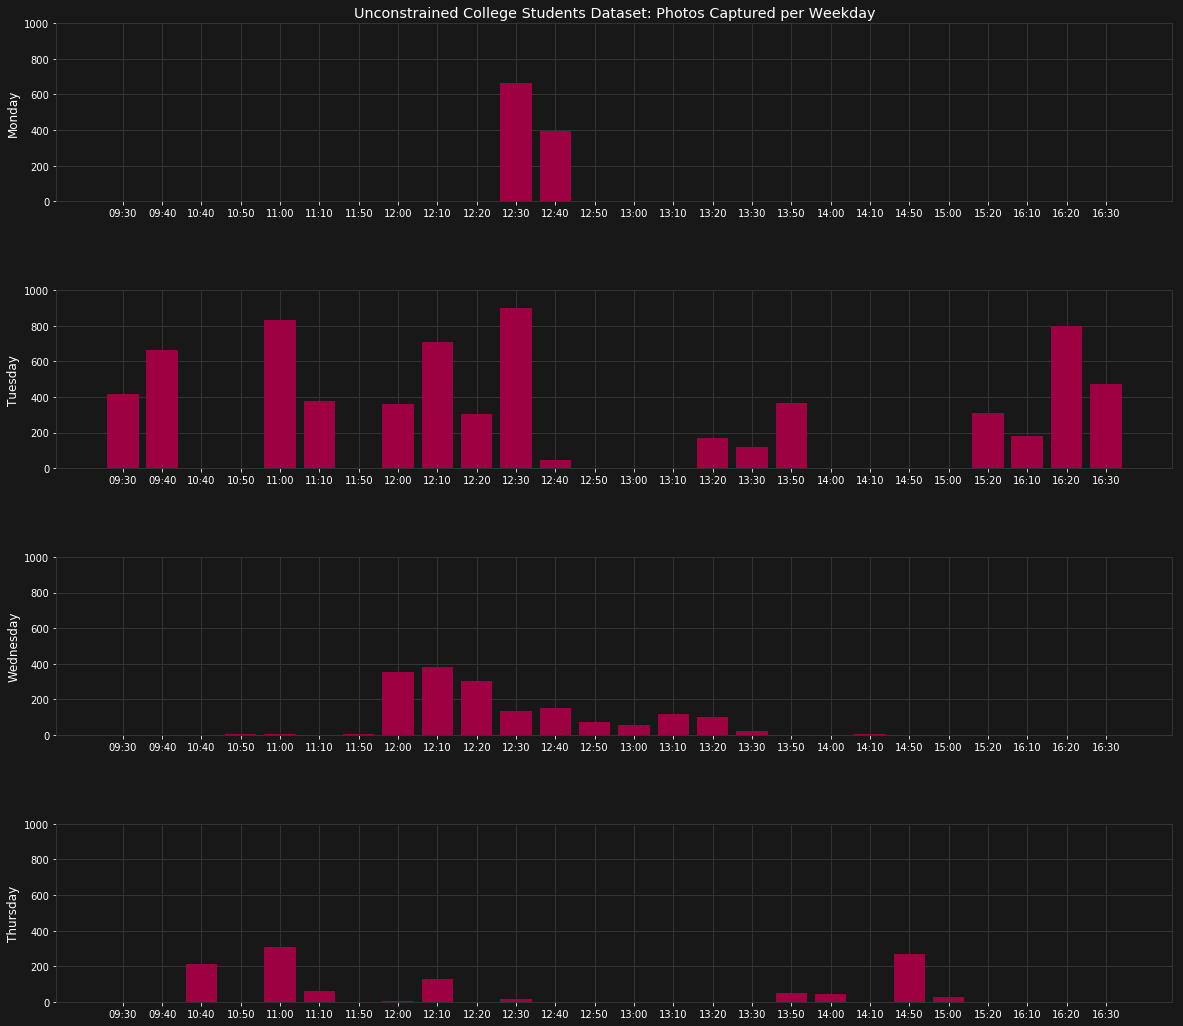

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,18), dpi=72, facecolor=face_clr)
fig.subplots_adjust(hspace=0.5)

display_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
for i, display_day in enumerate(display_days):
  # Monday
  print(display_day)
  ax = plt.subplot('41{}'.format(i+1))
  x = list(time_buckets[display_day].keys())
  x_label_idxs = list(range(0,len(x)))
  x_labels = x.copy()
  y = [v for k,v in time_buckets[display_day].items()]
  plt.ylim([0,max_photos])
  plt.ylabel(display_day)
  ax.set_facecolor(face_clr)
  plt.bar(x, y, color=bar_clr)
  ax.grid(linestyle='-', linewidth='1', color=grid_clr)
  plt.setp(ax.spines.values(), color=frame_clr)

ax = plt.subplot('411')
plt.title('Unconstrained College Students Dataset: Photos Captured per Weekday')

plt.show()

In [349]:
fig.savefig('/mnt/ahprojects/tmp/uccs_exif_plot.png', dpi=fig.dpi, transparent=True)